# <center> Assignment 1
## <center> Training and testing
### <div align='right'> Muhammed Jassim </div>
### <div align='right'> MDS202220 </div>

### Importing libraries

In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns

from ipynb.fs.full.prepare import load_data, preprocess_data, split_data, store_splits

### Loading data

In [2]:
data = load_data("./data/emails.csv")
data.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [3]:
data.shape

(5728, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


This dataset contains a collection of email text messages, labeled as either spam or not spam. Each email message is associated with a binary label, where $1$ indicates that the email is spam, and $0$ indicates that it is not spam. The dataframe `data` contains two columns: *text*(`str`) and *spam*(`int`). There are $5728$ datapoints in the data.

In [5]:
data['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

Our dataset contains $4360$ non-spam emails and $1368$ spam emails.

### Function for visualization

In [6]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

### Preprocessing

In [7]:
data = preprocess_data(data)

### Train, validation and test splitting

In [8]:
# Split data into train, validation, and test sets
train, validation, test = split_data(data)

### Storing the splits

In [9]:
# Store the splits
store_splits(train, validation, test)

Now we have saved the train, validation and test data into seperate `.csv` files in the `data\` folder.

### Vectorizing the text

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train['text'])
y_train = train['spam']

## Multinomial Naive Bayes Model

In [11]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [12]:
# Score on train and validation sets
X_validation = vectorizer.transform(validation['text'])
predictions_train = nb_model.predict(X_train)
predictions_validation = nb_model.predict(X_validation)

print("Train Accuracy:", accuracy_score(y_train, predictions_train))
print("Validation Accuracy:", accuracy_score(validation['spam'], predictions_validation))

Train Accuracy: 0.9969986357435198
Validation Accuracy: 0.9869138495092693


In [13]:
# Evaluate on train and validation sets
print("\nMultinomial Naive Bayes Model - Evaluation:")
print("Train Classification Report:\n", classification_report(y_train, predictions_train))
print("Validation Classification Report:\n", classification_report(validation['spam'], predictions_validation))


Multinomial Naive Bayes Model - Evaluation:
Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2797
           1       0.99      1.00      0.99       868

    accuracy                           1.00      3665
   macro avg       0.99      1.00      1.00      3665
weighted avg       1.00      1.00      1.00      3665

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       707
           1       0.97      0.97      0.97       210

    accuracy                           0.99       917
   macro avg       0.98      0.98      0.98       917
weighted avg       0.99      0.99      0.99       917



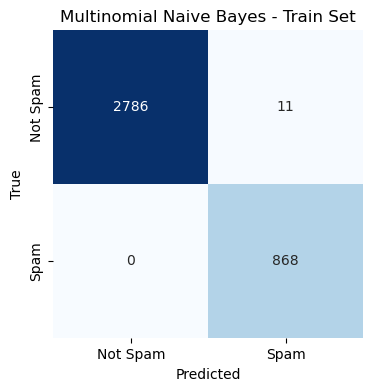

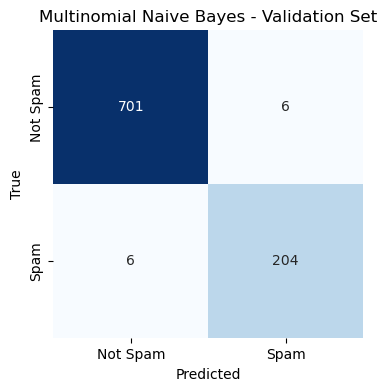

In [14]:
# Plot confusion matrix for Multinomial Naive Bayes model
plot_confusion_matrix(y_train, predictions_train, 'Multinomial Naive Bayes - Train Set')
plot_confusion_matrix(validation['spam'], predictions_validation, 'Multinomial Naive Bayes - Validation Set')

## Logistic Regression Model

In [15]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Score on train and validation sets
predictions_train = lr_model.predict(X_train)
predictions_validation = lr_model.predict(X_validation)

print("Train Accuracy:", accuracy_score(y_train, predictions_train))
print("Validation Accuracy:", accuracy_score(validation['spam'], predictions_validation))

Train Accuracy: 1.0
Validation Accuracy: 0.9869138495092693


In [17]:
# Evaluate on train and validation sets
print("\nLogistic Regression Model - Evaluation:")
print("Train Classification Report:\n", classification_report(y_train, predictions_train))
print("Validation Classification Report:\n", classification_report(validation['spam'], predictions_validation))


Logistic Regression Model - Evaluation:
Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2797
           1       1.00      1.00      1.00       868

    accuracy                           1.00      3665
   macro avg       1.00      1.00      1.00      3665
weighted avg       1.00      1.00      1.00      3665

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       707
           1       0.99      0.95      0.97       210

    accuracy                           0.99       917
   macro avg       0.99      0.97      0.98       917
weighted avg       0.99      0.99      0.99       917



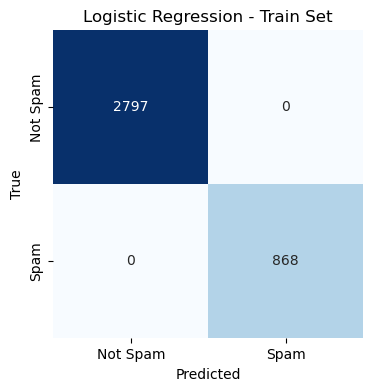

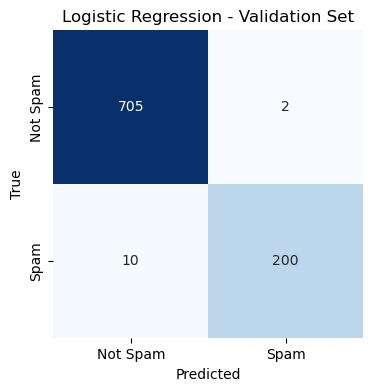

In [18]:
# Plot confusion matrix for Logistic Regression model
plot_confusion_matrix(y_train, predictions_train, 'Logistic Regression - Train Set')
plot_confusion_matrix(validation['spam'], predictions_validation, 'Logistic Regression - Validation Set')

## Random Forest Model

In [19]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# Score on train and validation sets
predictions_train = rf_model.predict(X_train)
predictions_validation = rf_model.predict(X_validation)

print("Train Accuracy:", accuracy_score(y_train, predictions_train))
print("Validation Accuracy:", accuracy_score(validation['spam'], predictions_validation))

Train Accuracy: 1.0
Validation Accuracy: 0.9770992366412213


In [21]:
# Evaluate on train and validation sets
print("\nRandom Forest Model - Evaluation:")
print("Train Classification Report:\n", classification_report(y_train, predictions_train))
print("Validation Classification Report:\n", classification_report(validation['spam'], predictions_validation))


Random Forest Model - Evaluation:
Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2797
           1       1.00      1.00      1.00       868

    accuracy                           1.00      3665
   macro avg       1.00      1.00      1.00      3665
weighted avg       1.00      1.00      1.00      3665

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       707
           1       0.99      0.90      0.95       210

    accuracy                           0.98       917
   macro avg       0.98      0.95      0.97       917
weighted avg       0.98      0.98      0.98       917



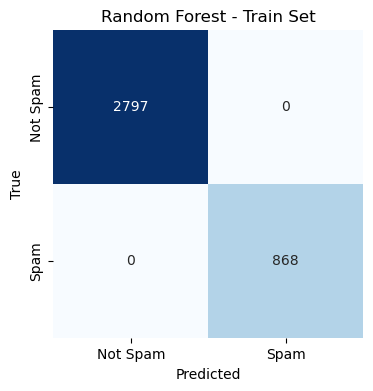

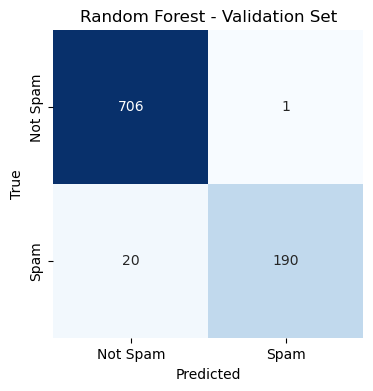

In [22]:
# Plot confusion matrix for Random Forest model
plot_confusion_matrix(y_train, predictions_train, 'Random Forest - Train Set')
plot_confusion_matrix(validation['spam'], predictions_validation, 'Random Forest - Validation Set')

## Performance comparison on test data

In [23]:
X_test = vectorizer.transform(test['text'])
y_test = test['spam']

### Multinomial Naive Bayes Model


Multinomial Naive Bayes Model - Test Accuracy: 0.9860383944153578

Multinomial Naive Bayes Model - Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       856
           1       0.98      0.97      0.97       290

    accuracy                           0.99      1146
   macro avg       0.98      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



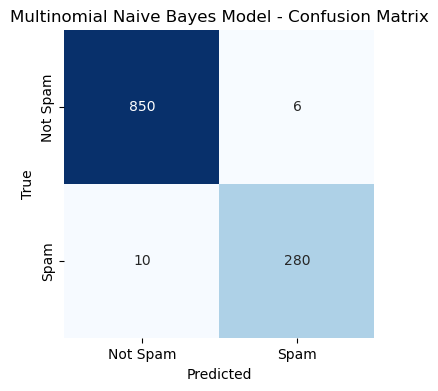

In [24]:
# Predictions
predictions_test = nb_model.predict(X_test)

accuracy_test = accuracy_score(y_test, predictions_test)
print(f"\nMultinomial Naive Bayes Model - Test Accuracy: {accuracy_test}")

# Classification report
print(f"\nMultinomial Naive Bayes Model - Test Classification Report:")
print(classification_report(y_test, predictions_test))

# Confusion matrix
plot_confusion_matrix(y_test, predictions_test, f'Multinomial Naive Bayes Model - Confusion Matrix')

### Logistic Regression Model


Logistic Regression Model - Test Accuracy: 0.9886561954624782

Logistic Regression Model - Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       856
           1       0.98      0.97      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



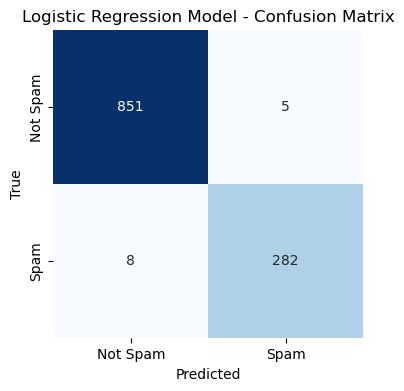

In [25]:
# Predictions
predictions_test = lr_model.predict(X_test)

accuracy_test = accuracy_score(y_test, predictions_test)
print(f"\nLogistic Regression Model - Test Accuracy: {accuracy_test}")

# Classification report
print(f"\nLogistic Regression Model - Test Classification Report:")
print(classification_report(y_test, predictions_test))

# Confusion matrix
plot_confusion_matrix(y_test, predictions_test, f'Logistic Regression Model - Confusion Matrix')

### Random Forest Model


Random Forest Model - Test Accuracy: 0.9712041884816754

Random Forest Model - Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       856
           1       1.00      0.89      0.94       290

    accuracy                           0.97      1146
   macro avg       0.98      0.94      0.96      1146
weighted avg       0.97      0.97      0.97      1146



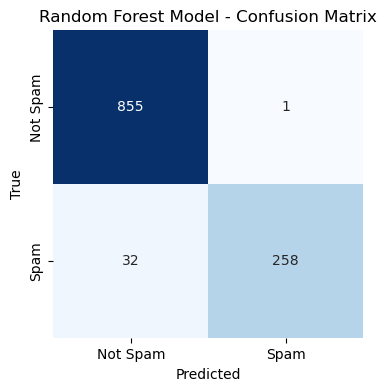

In [26]:
# Predictions
predictions_test = rf_model.predict(X_test)

accuracy_test = accuracy_score(y_test, predictions_test)
print(f"\nRandom Forest Model - Test Accuracy: {accuracy_test}")

# Classification report
print(f"\nRandom Forest Model - Test Classification Report:")
print(classification_report(y_test, predictions_test))

# Plot confusion matrix
plot_confusion_matrix(y_test, predictions_test, f'Random Forest Model - Confusion Matrix')

## Conclusion

In this e-mail spam classification, we implemented and evaluated three machine learning models: Random Forest, Logistic Regression, and Multinomial Naive Bayes. Each model was trained on a carefully prepared dataset, including text preprocessing techniques such as lowercasing, punctuation removal, tokenization, stop-words removal, and stemming.

The performance on the test set can be summarised as follows:

1. **Random Forest Model:**
   - Test Accuracy: 96.68%
   - Precision, Recall, and F1-score show excellent results for both spam and non-spam classes.

2. **Logistic Regression Model:**
   - Test Accuracy: 98.87%
   - The model demonstrates outstanding accuracy and a balanced trade-off between precision and recall.

3. **Multinomial Naive Bayes Model:**
   - Test Accuracy: 98.60%
   - Achieves high accuracy with reliable precision and recall values for both classes.

**Performance comparison:**
- All models perform exceptionally well, achieving accuracies above 96%.
- The **Logistic Regression model** stands out with the highest test accuracy, precision, and recall among the three models.